# 0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Препроцессинг

In [3]:
# upload data and look on it
eurusd = pd.read_csv('data_eurusd.csv', index_col=0)
eurusd

,period,open,high,low,close,returns
1,1999-04-08 11:00:00,1.0803,1.0817,1.0797,1.0809,NaN
2,1999-04-08 12:00:00,1.0808,1.0821,1.0806,1.0807,-0.018505
3,1999-04-08 13:00:00,1.0809,1.0814,1.0801,1.0813,0.055504
4,1999-04-08 14:00:00,1.0819,1.0845,1.0815,1.0844,0.286282
5,1999-04-08 15:00:00,1.0839,1.0857,1.0832,1.0844,0.000000
...,...,...,...,...,...,...
99231,2015-04-07 14:00:00,1.0857,1.0877,1.0855,1.0858,0.000000
99232,2015-04-07 15:00:00,1.0859,1.0859,1.0841,1.0849,-0.082923
99233,2015-04-07 16:00:00,1.0848,1.0871,1.0845,1.0868,0.174978
99234,2015-04-07 17:00:00,1.0867,1.0884,1.0856,1.0858,-0.092056


In [4]:
eurusd = eurusd[['period', 'open', 'close']]
eurusd

,period,open,close
1,1999-04-08 11:00:00,1.0803,1.0809
2,1999-04-08 12:00:00,1.0808,1.0807
3,1999-04-08 13:00:00,1.0809,1.0813
4,1999-04-08 14:00:00,1.0819,1.0844
5,1999-04-08 15:00:00,1.0839,1.0844
...,...,...,...
99231,2015-04-07 14:00:00,1.0857,1.0858
99232,2015-04-07 15:00:00,1.0859,1.0849
99233,2015-04-07 16:00:00,1.0848,1.0868
99234,2015-04-07 17:00:00,1.0867,1.0858


# 2. Цены активов на периоде исследования

In [5]:
# добавим столбец для графика

eurusd['price'] = eurusd.apply(lambda x: np.mean((x.open, x.close)), axis=1)

In [6]:
eurusd.head()

,period,open,close,price
1,1999-04-08 11:00:00,1.0803,1.0809,1.08060
2,1999-04-08 12:00:00,1.0808,1.0807,1.08075
3,1999-04-08 13:00:00,1.0809,1.0813,1.08110
4,1999-04-08 14:00:00,1.0819,1.0844,1.08315
5,1999-04-08 15:00:00,1.0839,1.0844,1.08415


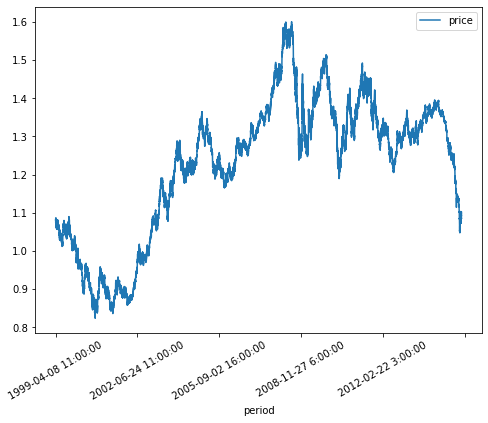

In [7]:
eurusd.plot(x='period', y='price', figsize=(8,6))
plt.xticks(rotation=30)
plt.show()

# 3. Статистический анализ цен открытия и закрытия, доходностей

In [8]:
eurusd.open.describe()

count    99235.000000
mean         1.224727
std          0.182324
min          0.823400
25%          1.081600
50%          1.273800
75%          1.352200
max          1.601500
Name: open, dtype: float64

In [9]:
eurusd.close.describe()

count    99235.000000
mean         1.224728
std          0.182323
min          0.823300
25%          1.081600
50%          1.273700
75%          1.352200
max          1.601600
Name: close, dtype: float64

In [10]:
# добавим столбец доходности

eurusd['profit'] = eurusd['close'] - eurusd['open']

In [11]:
eurusd.profit.describe()

count    99235.000000
mean         0.000001
std          0.001592
min         -0.024800
25%         -0.000600
50%          0.000000
75%          0.000700
max          0.030200
Name: profit, dtype: float64

# 4. Используем торговые правила

## 4.1 `momentum`

In [12]:
eurusd = momentum(eurusd)

In [13]:
eurusd

,period,open,close,price,profit,momentum
1,1999-04-08 11:00:00,1.0803,1.0809,1.08060,0.0006,nothing
2,1999-04-08 12:00:00,1.0808,1.0807,1.08075,-0.0001,nothing
3,1999-04-08 13:00:00,1.0809,1.0813,1.08110,0.0004,nothing
4,1999-04-08 14:00:00,1.0819,1.0844,1.08315,0.0025,nothing
5,1999-04-08 15:00:00,1.0839,1.0844,1.08415,0.0005,nothing
...,...,...,...,...,...,...
99231,2015-04-07 14:00:00,1.0857,1.0858,1.08575,0.0001,short
99232,2015-04-07 15:00:00,1.0859,1.0849,1.08540,-0.0010,short
99233,2015-04-07 16:00:00,1.0848,1.0868,1.08580,0.0020,short
99234,2015-04-07 17:00:00,1.0867,1.0858,1.08625,-0.0009,short


In [14]:
# Частотный анализ действий стратегии

eurusd.momentum.value_counts()

long       51662
short      46563
nothing     1010
Name: momentum, dtype: int64

## 4.2 `mean reversion`

In [15]:
eurusd = mean_reversion(eurusd)
eurusd

,period,open,close,price,profit,momentum,mean_reversion
1,1999-04-08 11:00:00,1.0803,1.0809,1.08060,0.0006,nothing,nothing
2,1999-04-08 12:00:00,1.0808,1.0807,1.08075,-0.0001,nothing,nothing
3,1999-04-08 13:00:00,1.0809,1.0813,1.08110,0.0004,nothing,nothing
4,1999-04-08 14:00:00,1.0819,1.0844,1.08315,0.0025,nothing,nothing
5,1999-04-08 15:00:00,1.0839,1.0844,1.08415,0.0005,nothing,nothing
...,...,...,...,...,...,...,...
99231,2015-04-07 14:00:00,1.0857,1.0858,1.08575,0.0001,short,long
99232,2015-04-07 15:00:00,1.0859,1.0849,1.08540,-0.0010,short,long
99233,2015-04-07 16:00:00,1.0848,1.0868,1.08580,0.0020,short,long
99234,2015-04-07 17:00:00,1.0867,1.0858,1.08625,-0.0009,short,long


In [16]:
# Частотный анализ действий стратегии

eurusd.mean_reversion.value_counts()

short      51662
long       46563
nothing     1010
Name: mean_reversion, dtype: int64

## 4.3 `Hurst Rule`

In [17]:
eurusd = hurst_rule(eurusd)

In [18]:
eurusd

,period,open,close,price,profit,momentum,mean_reversion,hurst_rule
1,1999-04-08 11:00:00,1.0803,1.0809,1.08060,0.0006,nothing,nothing,nothing
2,1999-04-08 12:00:00,1.0808,1.0807,1.08075,-0.0001,nothing,nothing,nothing
3,1999-04-08 13:00:00,1.0809,1.0813,1.08110,0.0004,nothing,nothing,nothing
4,1999-04-08 14:00:00,1.0819,1.0844,1.08315,0.0025,nothing,nothing,nothing
5,1999-04-08 15:00:00,1.0839,1.0844,1.08415,0.0005,nothing,nothing,nothing
...,...,...,...,...,...,...,...,...
99231,2015-04-07 14:00:00,1.0857,1.0858,1.08575,0.0001,short,long,long
99232,2015-04-07 15:00:00,1.0859,1.0849,1.08540,-0.0010,short,long,long
99233,2015-04-07 16:00:00,1.0848,1.0868,1.08580,0.0020,short,long,long
99234,2015-04-07 17:00:00,1.0867,1.0858,1.08625,-0.0009,short,long,long


In [19]:
eurusd = count_cumsum(eurusd)

In [20]:
eurusd.head()

,period,open,close,price,profit,momentum,mean_reversion,hurst_rule,str_momentum,str_reversion,str_hurst,delta_momentum,delta_reversion,delta_hurst,cumsum_momentum,cumsum_reversion,cumsum_hurst,cumsum_hold
1,1999-04-08 11:00:00,1.0803,1.0809,1.08060,0.0006,nothing,nothing,nothing,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0006
2,1999-04-08 12:00:00,1.0808,1.0807,1.08075,-0.0001,nothing,nothing,nothing,0,0,0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0005
3,1999-04-08 13:00:00,1.0809,1.0813,1.08110,0.0004,nothing,nothing,nothing,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0009
4,1999-04-08 14:00:00,1.0819,1.0844,1.08315,0.0025,nothing,nothing,nothing,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0034
5,1999-04-08 15:00:00,1.0839,1.0844,1.08415,0.0005,nothing,nothing,nothing,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039


In [21]:
eurusd['cumsum_hold'] = eurusd['profit'].cumsum()

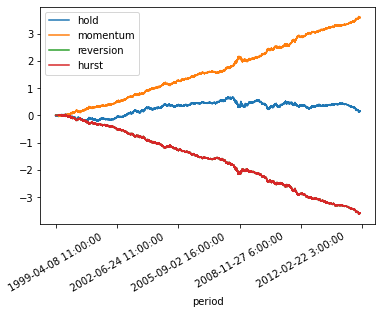

In [22]:
plot_all(eurusd, 'hold', 'momentum', 'reversion', 'hurst')

Так как везде экспонента Hurst была меньше 0.5, стратегия по правилу Херста приносит те же результаты, что и reversion

In [23]:
eurusd[eurusd['hurst_rule'] != eurusd['mean_reversion']]

,period,open,close,price,profit,momentum,mean_reversion,hurst_rule,str_momentum,str_reversion,str_hurst,delta_momentum,delta_reversion,delta_hurst,cumsum_momentum,cumsum_reversion,cumsum_hurst,cumsum_hold


Таким образом, при окне в 1000 значений лучше всего показала себя стратегия momentum.

Сравним результаты с вариантом, когда окно составляет 5000 значений.

In [25]:
eurusd = pd.read_csv('data_eurusd.csv', index_col=0)
eurusd = eurusd[['period', 'open', 'close']]
eurusd['price'] = eurusd.apply(lambda x: np.mean((x.open, x.close)), axis=1)
eurusd['profit'] = eurusd['close'] - eurusd['open']
eurusd = momentum(eurusd,window=5000)
eurusd = mean_reversion(eurusd,window=5000)
eurusd = hurst_rule(eurusd,window=5000)
eurusd = count_cumsum(eurusd)

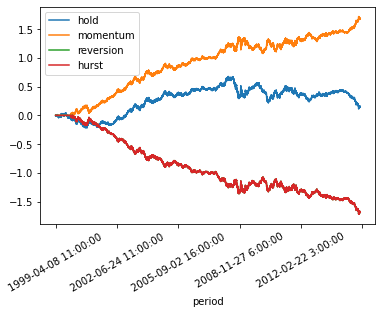

In [26]:
plot_all(eurusd, 'hold', 'momentum', 'reversion', 'hurst')

In [27]:
eurusd[eurusd['hurst_rule'] != eurusd['mean_reversion']]

,period,open,close,price,profit,momentum,mean_reversion,hurst_rule,str_momentum,str_reversion,str_hurst,delta_momentum,delta_reversion,delta_hurst,cumsum_momentum,cumsum_reversion,cumsum_hurst,cumsum_hold


Снова ситуация повторяется - правило momentum даёт большую прибыль, чем другие стратегии